In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("./seasonStats.csv")
df = df.dropna()

In [3]:
df = df.loc[df["GamesWon"] > 0]
df.loc[(df["GamesWon"] >= 0) & (df["GamesWon"] <=10), "GamesWon"] = 10
df.loc[(df["GamesWon"] >= 11) & (df["GamesWon"] <=20), "GamesWon"] = 20
df.loc[(df["GamesWon"] >= 21) & (df["GamesWon"] <= 30), "GamesWon"] = 30
df.loc[(df["GamesWon"] >= 31) , "GamesWon"] = 40

In [4]:
X_mod = df.drop(["Unnamed: 0", "Season", "TeamID", "GamesWon", "HighDay"], axis = 1)
X_mod_cols = X_mod.columns
X_num = np.array(X_mod)
X_num = MinMaxScaler().fit_transform(X_num)
y_num = np.array(df[["GamesWon"]])

In [5]:
encoding_dim = 2

input_data = keras.Input(shape =(39,))

encoded = layers.Dense(32, activation='relu')(input_data)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(39, activation='sigmoid')(decoded)


autoencoder = keras.Model(input_data, decoded)
encoder = keras.Model(input_data, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
# decoder_layer
# decoder = keras.Model(encoded_input, decoder_layer3(dec))

In [34]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X_train = X_num[:6000]
X_test = X_num[6000:]

autoencoder.fit(X_train, X_train,
                epochs=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose = 0
               )

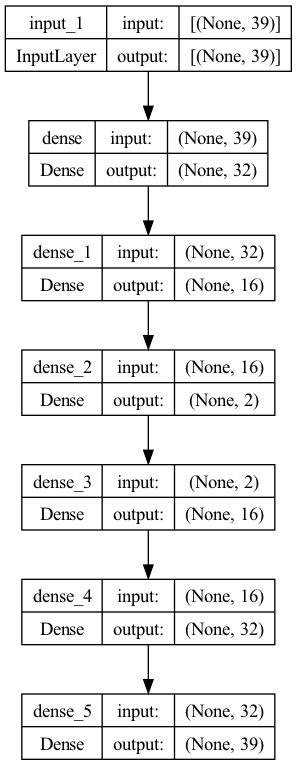

In [35]:
keras.utils.plot_model(autoencoder, to_file="./plots/architecture.png", show_shapes=True)

In [36]:
decoded_data = autoencoder.predict(X_num)
decoded_data[1]

227/227 [==============================] - 0s 311us/step


array([0.4913003 , 0.42627367, 0.39628956, 0.35850465, 0.5578767 ,
       0.53861433, 0.5653559 , 0.59380907, 0.41913298, 0.42886427,
       0.3287746 , 0.35008764, 0.6470563 , 0.3852384 , 0.55241454,
       0.43901142, 0.48035705, 0.37598807, 0.35330066, 0.50808454,
       0.39401895, 0.38799572, 0.35848522, 0.40177554, 0.4230875 ,
       0.7583646 , 0.4592884 , 0.32151747, 0.27262777, 0.2979352 ,
       0.38195622, 0.38509303, 0.42270717, 0.48817945, 0.37027243,
       0.41606972, 0.22748709, 0.293314  , 0.6485917 ], dtype=float32)

In [37]:
encoded_data = encoder.predict(X_num)
encoded_data[2]

227/227 [==============================] - 0s 265us/step


array([0.57430124, 0.11325693], dtype=float32)

In [38]:
df["e0"] = encoded_data[:, 0]
df["e1"] = encoded_data[:, 1]
# df["e2"] = encoded_data[:, 2]
# df["e3"] = encoded_data[:, 3]

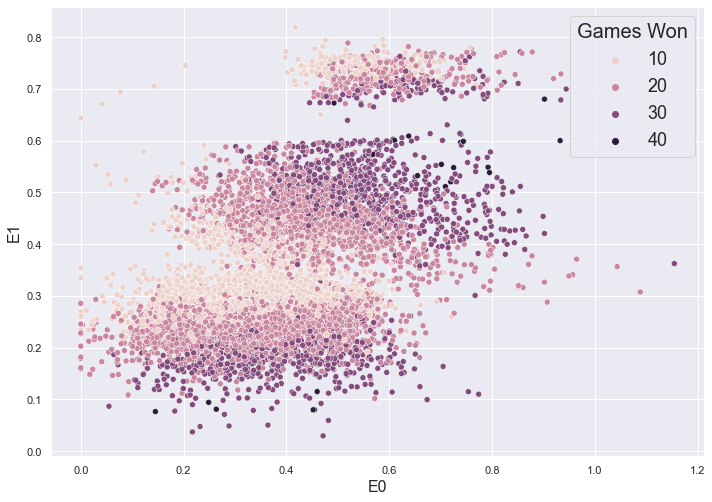

In [39]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(data = df, x = "e0", y = "e1", hue= "GamesWon")
ax.set_xlabel("E0", size=16)
ax.set_ylabel("E1", size=16)
ax.legend(title="Games Won", fontsize=18, title_fontsize=20)
plt.savefig("./plots/AutoEncodeExample6.png", dpi=200)